# Creating Sample Transaction Data

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlxtend.frequent_patterns
import mlxtend.preprocessing

In [2]:
# Create 10 fake transactions featuring grocery store items
example = [['milk', 'bread', 'apples', 'cereal', 'jelly', 'cookies', 'salad', 'tomatoes'], 
           ['beer', 'milk', 'chips', 'salsa', 'grapes', 'wine', 'potatoes', 'eggs', 'carrots'],
           ['diapers', 'baby formula', 'milk', 'bread', 'chicken', 'asparagus', 'cookies'], 
           ['milk', 'cookies', 'chicken', 'asparagus', 'broccoli', 'cereal', 'orange juice'], 
           ['steak', 'asparagus', 'broccoli', 'chips', 'salsa', 'ketchup', 'potatoes', 'salad'], 
           ['beer', 'salsa', 'asparagus', 'wine', 'cheese', 'crackers', 'strawberries', 'cookies'],
           ['chocolate cake', 'strawberries', 'wine', 'cheese', 'beer', 'milk', 'orange juice'],
           ['chicken', 'peas', 'broccoli', 'milk', 'bread', 'eggs', 'potatoes', 'ketchup', 'crackers'],
           ['eggs', 'bread', 'cheese', 'turkey', 'salad', 'tomatoes', 'wine', 'steak', 'carrots'],
           ['bread', 'milk', 'tomatoes', 'cereal', 'chicken', 'turkey', 'chips', 'salsa', 'diapers']]

# Computing Metrics

In [3]:
# define Frequency(Milk), Frequency(Bread) and Frequency(Milk, Bread)
N = len(example) # Number of transactions

f_x = sum(['milk' in i for i in example]) # frequency of milk
f_y = sum(['bread' in i for i in example]) # frequency of bread
f_x_y = sum( [ all(w in i for w in ['milk', 'bread']) for i in example ] ) # frequency of milk and bread

In [4]:
print(f'N = {N}\nFreq(x) = {f_x}\nFreq(y) = {f_y}\nFreq(x, y) = {f_x_y}')

N = 10
Freq(x) = 7
Freq(y) = 5
Freq(x, y) = 4


<b> Support </b> is simply the probability that a given item set appears in the data, which can be calculated by counting the number of transactions in which the item set appears and dividing that count by the total number of transactions.

In [5]:
# calculate support
support = f_x_y / N
print(f'Support = {round(support, 4)}')

Support = 0.4


The <b>confidence</b> metric can be thought of in terms of conditional probability, as it is basically the probability that product B is purchased given the purchase of product A.

In [6]:
# calculate confidence
confidence = support / (f_x / N)
print(f'Confidence = {round(confidence, 4)}')

Confidence = 0.5714


The confidence of x to y is 0.5714. This means that the probability of Y being purchased given that x was purchased is just slightly higher than 50%.

Comparing the support of A and B under the standard case when A and B are not assumed to be independent with the case where the two products are assumed to be independent. <b>Lift</b> calculates the ratio of these two cases, so its range is [0, Infinity]. When lift equals one, the two products are independent and, hence, no conclusions can be made about product B when product A is purchased.

In [7]:
# calculate lift
lift = confidence / (f_y / N)
print(f'Lift = {round(lift, 4)}')

Lift = 1.1429


<b>Leverage</b> calculates the difference between the two cases, so its range is [-1, 1]. Leverage equaling zero can be interpreted the same way as lift equaling one.

In [8]:
# calculate laverage
leverage = support - ((f_x / N) * (f_y / N))
print(f'Leverage = {round(leverage, 4)}')

Leverage = 0.05


The leverage of x to y is 0.05. Both lift and leverage can be used to say that the association x to y is positive (in other words, x implies y) but weak. The values for lift and leverage are close to 1 and 0, respectively.

<b>Conviction</b> is the ratio of the expected frequency that X occurs without Y, given that X and Y are independent of the frequency of incorrect predictions.

In [9]:
# calculate conviction
conviction = (1 - (f_y / N)) / (1 - confidence)
print(f'Confidence = {round(confidence, 4)}')

Confidence = 0.5714


# Loading Data

In [10]:
# load data
online = pd.read_excel(io='datasets/Online Retail.xlsx', sheet_name='Online Retail', header=0)

In [11]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
# Print out the data type for each column in the DataFrame
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
# Get the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications
print(f'Data Dimension: {online.shape}')
print(f'Count of unique invoice numbers: {online.InvoiceNo.nunique()}')
print(f'Count of unique customer ids: {online.CustomerID.nunique()}')

Data Dimension: (541909, 8)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


# Data Cleaning and Formatting

In [14]:
# Create an indicator column stipulating whether the invoice number begins with "C"
online['IsCPresent'] = (online['InvoiceNo'].astype(str).apply(lambda x: 1 if x.find("C") != -1 else 0))

In [15]:
# Filter out all transactions having either zero or a negative number of items and 
# remove all invoice numbers starting with "C"
online1 = (online.loc[online['Quantity'] > 0])
online1 = (online.loc[online['IsCPresent'] != 1])
online1 = (online.loc[:, ['InvoiceNo', 'Description']].dropna())

In [16]:
# print online1
online1.head()

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


In [17]:
# Print out the dimensions of the cleaned DataFrame and the number of unique invoice numbers
print(f'Data Dimension: {online1.shape}')
print(f'Count of unique invoice numbers: {online1.InvoiceNo.nunique()}')

Data Dimension: (540455, 2)
Count of unique invoice numbers: 24446


In [18]:
# Extract the invoice numbers from the DataFrame as a list
invoiceno_list = online1.InvoiceNo.tolist()

In [19]:
# Remove duplicate elements to create a list of unique invoice numbers
invoiceno_list = list(set(invoiceno_list))

In [20]:
print(f'Length of list of invoice numbers: {len(invoiceno_list)}')

Length of list of invoice numbers: 24446


In [21]:
# Take the list and cut it to only include the first 5,000 elements
subset_invoiceno_list = invoiceno_list[0:5000]
print(f'Length of list of invoice numbers: {len(subset_invoiceno_list)}')

Length of list of invoice numbers: 5000


In [22]:
# Filter the online1 DataFrame down by only keeping the invoice numbers in the list from the preceding step
online1 = online1.loc[online1['InvoiceNo'].isin(subset_invoiceno_list)]
online1.head()

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


In [23]:
# print out the dimensions of the DataFrame and the number of unique invoice numbers
print(f'Data Dimension: {online1.shape}')
print(f'Count of unique invoice numbers: {online1.InvoiceNo.nunique()}')

Data Dimension: (118377, 2)
Count of unique invoice numbers: 5000


In [24]:
# iterate over the unique invoice numbers and extract the item descriptions as a list
invoice_item_list = []

for num in list(set(online1.InvoiceNo.tolist())):
    temp_df = online1.loc[online1['InvoiceNo'] == num]
    temp_itens = temp_df.Description.tolist()
    invoice_item_list.append(temp_itens)

In [25]:
print(invoice_item_list[1:5])

[['STRAWBERRY CERAMIC TRINKET BOX', 'SWEETHEART CERAMIC TRINKET BOX'], ['SET/3 RED GINGHAM ROSE STORAGE BOX', 'ROUND CAKE TIN VINTAGE RED', 'RECIPE BOX RETROSPOT ', 'GARDENERS KNEELING PAD KEEP CALM '], ['Manual'], ['SMALL GLASS HEART TRINKET POT']]


# Data Encoding

In [26]:
# Initialize and fit the transaction encoder
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [27]:
# Recast the encoded array as a DataFrame named online_encoder_df
online_encoder_df = pd.DataFrame(online_encoder_array, columns=online_encoder.columns_)

In [28]:
# seeing a part of the dataframe
online_encoder_df.loc[4970:4979, online_encoder_df.columns.tolist()[0:8]]

,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [29]:
# Print out the dimensions of the encoded DataFrame
print(f'Data Dimension: {online_encoder_df.shape}')

Data Dimension: (5000, 3254)


# Executing the Apriori Algorithm

In [30]:
# Run the Apriori algorithm using mlxtend
mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

,support,itemsets


The default minimum support value is set to 0.5, so since an empty DataFrame was returned, we know that all item sets have a support value of less than 0.5

In [31]:
# rerun the Apriori algorithm, but with the minimum support set to 0.01
mod_minsupport = mlxtend.frequent_patterns.apriori(online_encoder_df, min_support=0.01)
mod_minsupport.loc[0:6]

,support,itemsets
0,0.0100,(1)
1,0.0314,(2)
2,0.0156,(6)
3,0.0126,(11)
4,0.0152,(12)
5,0.0240,(13)
6,0.0184,(14)


This minimum support value is the same as saying that when analyzing 5,000 transactions, we need an item set to appear 50 times to be considered frequent.

In [32]:
# Rerun the Apriori algorithm with minimum support set to 0.01, but this time set use_colnames to True
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(online_encoder_df, min_support=0.01, use_colnames=True)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.0100,( OVAL WALL MIRROR DIAMANTE )
1,0.0314,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0156,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 MESSAGE CARDS WITH ENVELOPES)
4,0.0152,(12 PENCIL SMALL TUBE WOODLAND)
5,0.0240,(12 PENCILS SMALL TUBE RED RETROSPOT)
6,0.0184,(12 PENCILS SMALL TUBE SKULL)


In [33]:
# Add an additional column to the dataframe output that contains the size of the item set
mod_colnames_minsupport['length'] = (mod_colnames_minsupport['itemsets'].apply(lambda x: len(x)))
mod_colnames_minsupport[0:6]

,support,itemsets,length
0,0.0100,( OVAL WALL MIRROR DIAMANTE ),1
1,0.0314,( SET 2 TEA TOWELS I LOVE LONDON ),1
2,0.0156,(10 COLOUR SPACEBOY PEN),1
3,0.0126,(12 MESSAGE CARDS WITH ENVELOPES),1
4,0.0152,(12 PENCIL SMALL TUBE WOODLAND),1
5,0.0240,(12 PENCILS SMALL TUBE RED RETROSPOT),1


In [34]:
# Find the support of the item set containing 10 COLOUR SPACEBOY PEN
mod_colnames_minsupport[mod_colnames_minsupport['itemsets'] == frozenset({'10 COLOUR SPACEBOY PEN'})]

,support,itemsets,length
2,0.0156,(10 COLOUR SPACEBOY PEN),1


In [35]:
# Return all item sets of length 2 whose support is in the range [0.02, 0.021]
mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) & 
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
822,0.0204,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",2
930,0.0206,"(RED RETROSPOT CHARLOTTE BAG, CHARLOTTE BAG SU...",2
1125,0.0202,"(GIN + TONIC DIET METAL SIGN, PLEASE ONE PERSO...",2
1236,0.0200,"(JUMBO BAG RED RETROSPOT, HEART OF WICKER SMALL)",2
1325,0.0202,"(IVORY KITCHEN SCALES, RED KITCHEN SCALES)",2
1345,0.0206,"(RECIPE BOX PANTRY YELLOW DESIGN, JAM MAKING S...",2
1499,0.0208,"(WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG...",2
1527,0.0200,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",2
1682,0.0202,"(REGENCY CAKESTAND 3 TIER, PACK OF 72 RETROSPO...",2
1743,0.0200,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",2


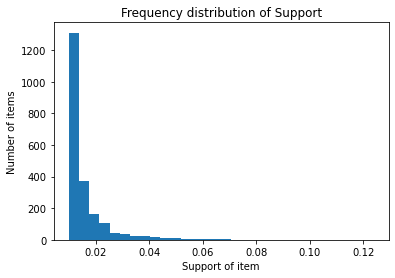

In [36]:
# plot the support values
mod_colnames_minsupport.hist('support', grid=False, bins=30)
plt.xlabel('Support of item')
plt.ylabel('Number of items')
plt.title('Frequency distribution of Support')
plt.show()

# Deriving Association Rules

In [37]:
# Use the mlxtend library to derive association rules for the online retail dataset
rules = mlxtend.frequent_patterns.association_rules(mod_colnames_minsupport,
                                                   metric='confidence',
                                                   min_threshold=0.6,
                                                   support_only=False)
rules.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0184,0.0240,0.0130,0.706522,29.438406,0.012558,3.325630
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0188,0.0494,0.0126,0.670213,13.567060,0.011671,2.882465
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0188,0.0478,0.0128,0.680851,14.243746,0.011901,2.983560
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0236,0.0494,0.0150,0.635593,12.866260,0.013834,2.608623
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0248,0.0494,0.0180,0.725806,14.692438,0.016775,3.466894
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0494,0.0478,0.0324,0.655870,13.721139,0.030039,2.766981
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0478,0.0494,0.0324,0.677824,13.721139,0.030039,2.950564


In [38]:
# print the number of associations
print(f'Number of Associations: {rules.shape[0]}')

Number of Associations: 598


In [39]:
# Try running another version of the model
rules2 = mlxtend.frequent_patterns.association_rules(mod_colnames_minsupport,
                                                     metric="lift",
                                                     min_threshold=50,
                                                     support_only=False)
rules2.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BEADED CRYSTAL HEART GREEN ON STICK),(BEADED CRYSTAL HEART PINK ON STICK),0.0122,0.0148,0.0104,0.852459,57.598582,0.010219,6.677467
1,(BEADED CRYSTAL HEART PINK ON STICK),(BEADED CRYSTAL HEART GREEN ON STICK),0.0148,0.0122,0.0104,0.702703,57.598582,0.010219,3.322600
2,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0138,0.0120,0.857143,62.111801,0.011807,6.903400
3,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0138,0.0140,0.0120,0.869565,62.111801,0.011807,7.559333
4,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
5,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
6,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE STAR DECORATION),0.0138,0.0140,0.0122,0.884058,63.146998,0.012007,8.504250


In [40]:
# print the number of associations
print(f'Number of Associations: {rules2.shape[0]}')

Number of Associations: 60


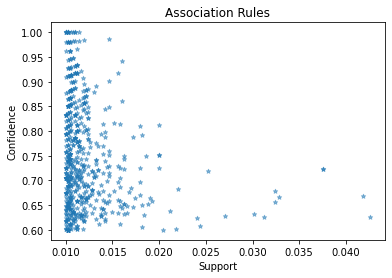

In [41]:
# Plot confidence against support and identify specific trends in the data
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

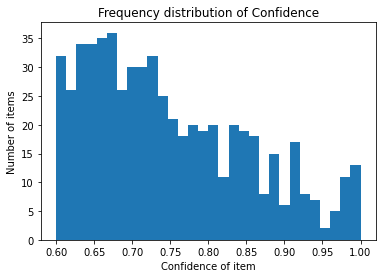

In [42]:
# look at the distribution of confidence
rules.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

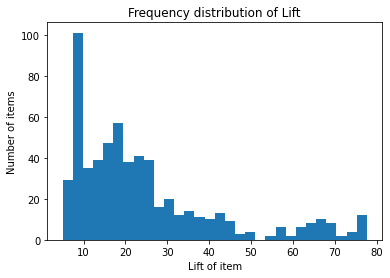

In [43]:
# look at the distribution of lift
rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show()

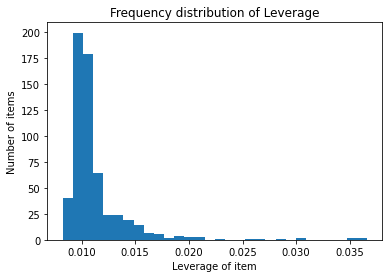

In [44]:
# look at the distribution of leverage
rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show()

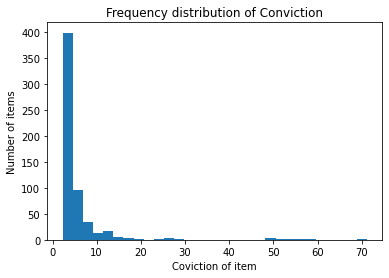

In [45]:
# look at the distribution of conviction
plt.hist(rules[np.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.xlabel("Coviction of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Conviction")
plt.show()

What is interesting about the four distributions is that spikes of varying sizes appear at the upper ends of the plots, implying that there are a few very strong association rules. 